### High and Low Pass Filters

Now, you might be wondering, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain!

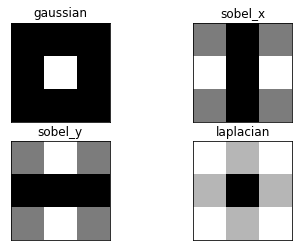

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x','sobel_y','laplacian']

# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image.

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (detects edges regardless of orientation) filter, should block out low-frequencies!

You are encouraged to load in an image, apply a filter to it using filter2d then visualize what the fourier transform of that image looks like before and after a filter is applied.

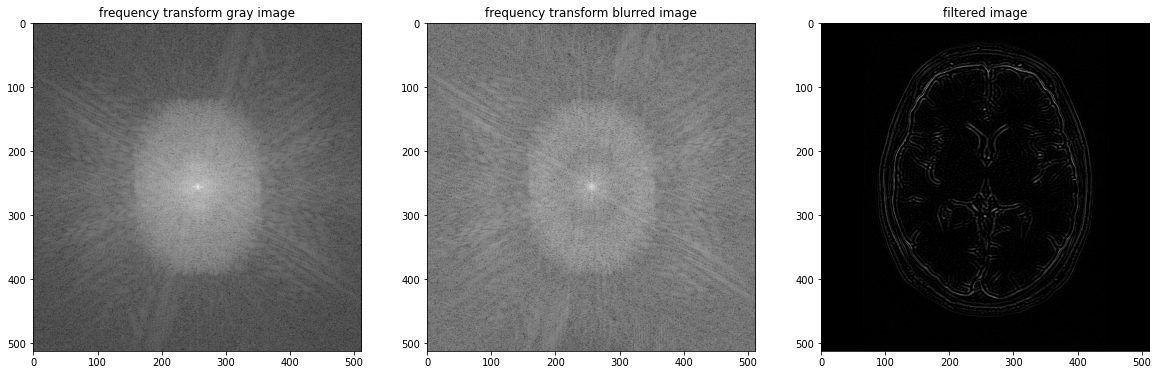

In [2]:
## load in an image, and filter it using a kernel of your choice
## apply a fourier transform to the original *and* filtered images and compare them

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

# Read in the image
image = cv2.imread('images/brain_MR.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)


# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)


# Create a Gaussian blurred image
filtered_image = cv2.filter2D(gray, -1, filters[3])


# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_filtered = filtered_image/255.0
norm_gray = gray/255.0

# Call the function on the normalized images
# and display the transforms
f_filtered = ft_image(norm_filtered)
f_gray = ft_image(norm_gray)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('frequency transform gray image')
ax1.imshow(f_gray, cmap='gray')

ax2.set_title('frequency transform blurred image')
ax2.imshow(f_filtered, cmap='gray')

ax3.set_title('filtered image')
ax3.imshow(filtered_image , cmap='gray')